# Project Overview

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

### bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular', 'telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')
### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

### Importing Libraries

In [28]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read Train Data and Test Data

In [103]:
#read data train
data_train = pd.read_csv("bank-additional-full.csv",sep=";")
data_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [104]:
#read data_test
data_test = pd.read_csv("bank-additional.csv", sep=";")
data_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


### Preprocessing the data

In [33]:
#Encoder categorial features
def categorize(df):
    new_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    new_df['job'] = le.fit_transform(new_df['job'])
    new_df['marital'] = le.fit_transform(new_df['marital'])
    new_df['education'] = le.fit_transform(new_df['education'])
    new_df['default'] = le.fit_transform(new_df['default'])
    new_df['housing'] = le.fit_transform(new_df['housing'])
    new_df['month'] = le.fit_transform(new_df['month'])
    new_df['loan'] = le.fit_transform(new_df['loan'])
    new_df['contact'] = le.fit_transform(new_df['contact'])
    new_df['day_of_week'] = le.fit_transform(new_df['day_of_week'])
    new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
    new_df['y'] = le.fit_transform(new_df['y'])
    return new_df

In [34]:
# concat and replace column with basic
data = pd.concat([data_train, data_test])
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

### Checking for null values

In [35]:
# check missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Data Visualization

<AxesSubplot:xlabel='count', ylabel='job'>

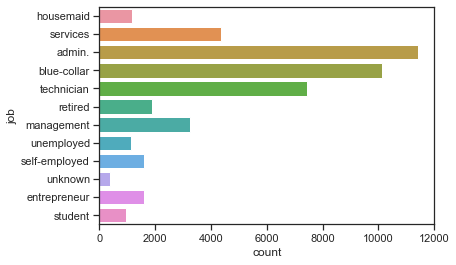

In [37]:
# Visualize job column
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=data)

In [38]:
# select job is unknown
data = data[data.job != 'unknown']

<AxesSubplot:xlabel='count', ylabel='marital'>

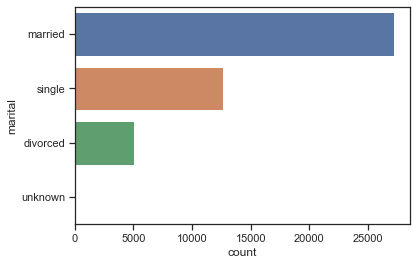

In [39]:
# cisualize marital feature
sns.countplot(y='marital', data=data)

In [40]:
# count marital column values
data.marital.value_counts()

married     27175
single      12638
divorced     5043
unknown        82
Name: marital, dtype: int64

In [41]:
#select unknow values in marital and loan features
data = data[data.marital != 'unknown']
data = data[data.loan != 'unknown']

<AxesSubplot:xlabel='count', ylabel='education'>

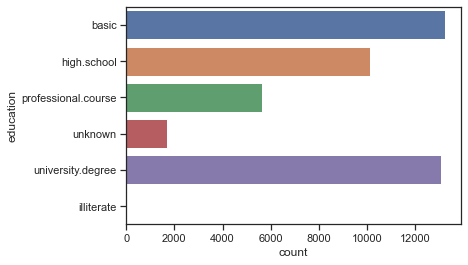

In [42]:
#visualize education column
sns.countplot(y='education', data=data)

In [43]:
# select illiterate value from education
data = data[data.education != 'illiterate']

In [44]:
# describe data
data.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,43748,43748,43748,43748,43748,43748,43748,43748,43748,43748,...,43748,43748,43748,43748,43748,43748,43748,43748,43748,43748
unique,78,11,3,5,3,2,2,2,10,5,...,41,27,8,3,10,26,26,316,11,2
top,31,admin.,married,basic,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,1.4,93.994,-36.4,4.857,5228.1,no
freq,2079,11174,26508,13231,34778,23514,36912,27915,14595,9160,...,18731,42139,37748,37748,17239,8157,8157,3027,17239,38828


<AxesSubplot:xlabel='count', ylabel='y'>

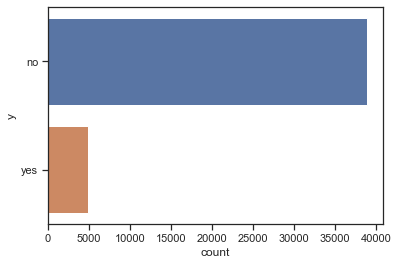

In [45]:
# visualize label column
sns.countplot(y='y', data=data)

From the above Picture, We can say that the data is imbalanced

### Checking for outliers using boxplots

In [105]:
data.head()

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,y
0,56,3,1,0,0,0,6,1,261,1,999,0,0
1,57,7,1,1,0,0,6,1,149,1,999,0,0
2,37,7,1,1,1,0,6,1,226,1,999,0,0
3,40,0,1,0,0,0,6,1,151,1,999,0,0
4,56,7,1,1,0,1,6,1,307,1,999,0,0


<AxesSubplot:xlabel='y', ylabel='education'>

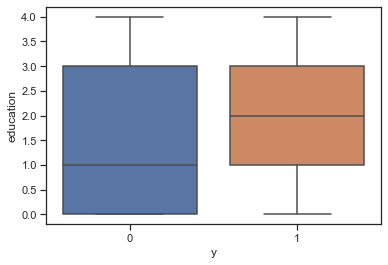

In [49]:
# visualize education column
sns.boxplot(x='y', y='education', data=data)

<AxesSubplot:xlabel='y', ylabel='housing'>

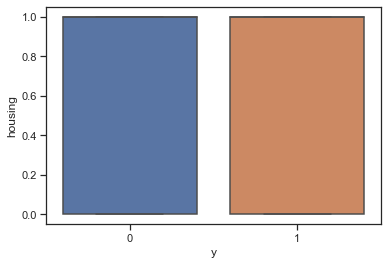

In [50]:
#visualize housing and label
sns.boxplot(x='y', y='housing', data=data)

C:\Users\naufa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='y', ylabel='job'>

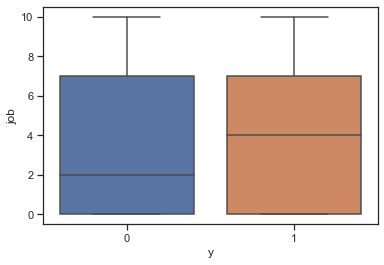

In [52]:
# visualize label and job 
sns.boxplot(data['y'],data['job'])

### Dropping less meaningful columns

<AxesSubplot:xlabel='education', ylabel='count'>

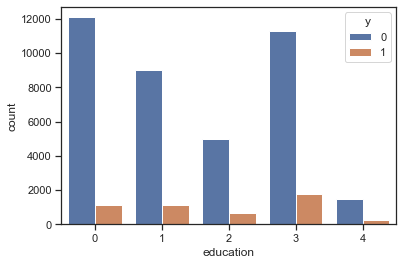

In [56]:
# visualize education and label
sns.countplot(x='education',hue='y',data=data)

<AxesSubplot:xlabel='default', ylabel='count'>

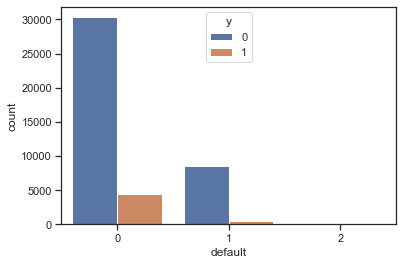

In [57]:
# visualize default and label
sns.countplot(x='default',hue='y',data=data)

It is skewed to 0. So We can drop this.

In [58]:
# drop default because of skewed
data = data.drop('default',axis=1)

<AxesSubplot:xlabel='poutcome', ylabel='count'>

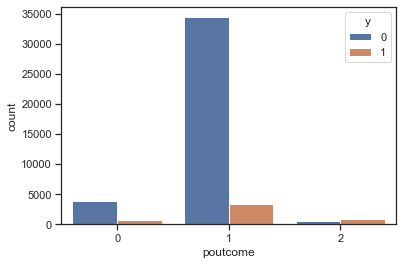

In [59]:
# visualize poutcome and label
sns.countplot(x='poutcome',hue='y',data=data)

So many non existent values. We can drop this

In [60]:
# drop poutcome
data = data.drop('poutcome',axis=1)

<AxesSubplot:xlabel='loan', ylabel='count'>

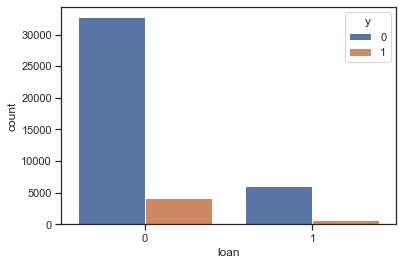

In [61]:
#visualize loan and label
sns.countplot(x='loan',hue='y',data=data)

<AxesSubplot:xlabel='contact', ylabel='count'>

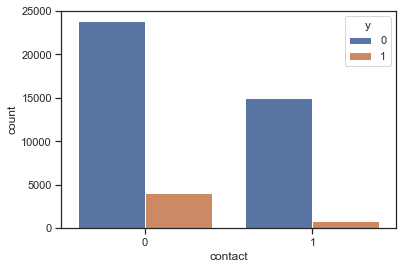

In [62]:
#visualize contact and label
sns.countplot(x='contact',hue='y',data=data)

In [63]:
#drop contact
data = data.drop('contact',axis=1)

In [64]:
#drop unnecessary column
data = data.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis=1)

### Splitting into train and test data

In [67]:
#split data into train and test data
X = data.drop('y',axis = 1).values
y = data['y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [68]:
#Scaler data train
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

In [69]:
#Feature selection with PCA
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)

In [70]:
X_train.shape

(32811, 10)

### Building different Models and validating using 10 fold cross validation

In [73]:
# append all model into an array
models = []
models.append(('LogReg', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('RandForest',RandomForestClassifier()))
models.append(('Naive Bayes', GaussianNB()))

In [74]:
# do kfold cross validation into modelling
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

C:\Users\naufa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\naufa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LogReg: 0.9041786672327758
KNN: 0.8971079587550133


C:\Users\naufa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.9032033826877222


C:\Users\naufa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Decison-Tree: 0.8749506836863435


C:\Users\naufa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandForest: 0.9127732920564007
Naive Bayes: 0.8942429692794797


C:\Users\naufa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### Testing with the test data

In [80]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)

In [81]:
pca.fit(X_test)
X_test = pca.fit_transform(X_test)

In [83]:
RandFor = RandomForestClassifier()
RandFor.fit(X_train, Y_train)
predictions = RandFor.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy :  0.8956752308676968
Confusion Matrix : 
 [[9440  297]
 [ 844  356]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9737
           1       0.55      0.30      0.38      1200

    accuracy                           0.90     10937
   macro avg       0.73      0.63      0.66     10937
weighted avg       0.88      0.90      0.88     10937



Dari hasil diatas dapat disimpulkan bahwa algoritma yang miliki akurasi tertinggi untuk data ini adalah random forest dengan tingkat akurasi 89%.